<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/john_charlie_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
library(tidyverse)
df <- read_csv("satgpa.csv") %>%
  mutate(Sex = case_when(
    sex == 1 ~ "Male",
    sex == 2 ~ "Female",
    TRUE     ~ NA_character_  # catch-all for unexpected values
  ))

Rows: 1000 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): sex, sat_v, sat_m, sat_sum, hs_gpa, fy_gpa

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


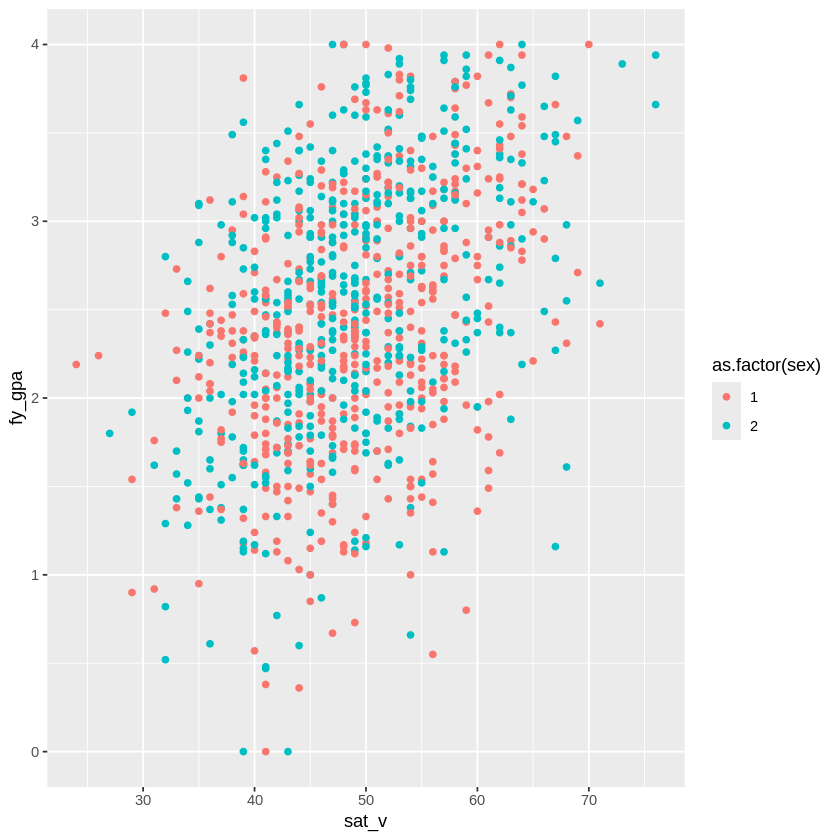

In [8]:
df %>% ggplot(aes(x=sat_v, y=fy_gpa, color=as.factor(sex))) + geom_point()

In [9]:
df %>% colnames

[1] "sex"     "sat_v"   "sat_m"   "sat_sum" "hs_gpa"  "fy_gpa"

In [16]:
model1 <- lm(fy_gpa ~ Sex + sat_v + sat_m + hs_gpa, data=df)
summary(model1)


Call:
lm(formula = fy_gpa ~ Sex + sat_v + sat_m + hs_gpa, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0601 -0.3478  0.0315  0.4106  1.7042 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.835161   0.148617  -5.620 2.49e-08 ***
SexMale     -0.141837   0.040077  -3.539  0.00042 ***
sat_v        0.016133   0.002635   6.123 1.32e-09 ***
sat_m        0.015513   0.002732   5.678 1.78e-08 ***
hs_gpa       0.545008   0.039505  13.796  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5908 on 995 degrees of freedom
Multiple R-squared:  0.3666,	Adjusted R-squared:  0.364 
F-statistic:   144 on 4 and 995 DF,  p-value: < 2.2e-16


In [18]:
model2 <- lm(fy_gpa ~ sat_v + sat_m + hs_gpa*Sex, data=df)
summary(model2)


Call:
lm(formula = fy_gpa ~ sat_v + sat_m + hs_gpa * Sex, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06686 -0.35182  0.03194  0.39598  1.62426 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.182295   0.190481  -6.207 7.92e-10 ***
sat_v           0.015616   0.002631   5.935 4.06e-09 ***
sat_m           0.015543   0.002722   5.710 1.49e-08 ***
hs_gpa          0.658147   0.055447  11.870  < 2e-16 ***
SexMale         0.508453   0.227999   2.230  0.02597 *  
hs_gpa:SexMale -0.202550   0.069919  -2.897  0.00385 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5886 on 994 degrees of freedom
Multiple R-squared:  0.3719,	Adjusted R-squared:  0.3687 
F-statistic: 117.7 on 5 and 994 DF,  p-value: < 2.2e-16
